In [7]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim


In [23]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [24]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 2,  7, 10,  3,  5,  8,  0,  6,  9]), tensor([1, 4]))

In [25]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [21]:
import torch.nn as nn
 
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)


tensor([[0.2706],
        [0.4202]], grad_fn=<AddmmBackward0>)

In [26]:
linear_model.weight

Parameter containing:
tensor([[0.1870]], requires_grad=True)

In [27]:
linear_model.bias

Parameter containing:
tensor([-0.8586], requires_grad=True)

In [28]:

x = torch.ones(1)
linear_model(x)



tensor([-0.6717], grad_fn=<ViewBackward0>)

In [31]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.6717],
        [-0.6717],
        [-0.6717],
        [-0.6717],
        [-0.6717],
        [-0.6717],
        [-0.6717],
        [-0.6717],
        [-0.6717],
        [-0.6717]], grad_fn=<AddmmBackward0>)

In [32]:

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [33]:
linear_model.parameters()

<generator object Module.parameters at 0x000002122B90A180>

In [34]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.8498]], requires_grad=True),
 Parameter containing:
 tensor([0.9005], requires_grad=True)]

In [35]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [36]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 120.6183, Validation loss 83.3279
Epoch 1000, Training loss 3.5008, Validation loss 2.7264
Epoch 2000, Training loss 2.9859, Validation loss 2.7311
Epoch 3000, Training loss 2.9778, Validation loss 2.7318

Parameter containing:
tensor([[5.3755]], requires_grad=True)
Parameter containing:
tensor([-17.2725], requires_grad=True)


In [37]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 299.5632, Validation loss 269.2049
Epoch 1000, Training loss 3.5038, Validation loss 2.7264
Epoch 2000, Training loss 2.9860, Validation loss 2.7311
Epoch 3000, Training loss 2.9778, Validation loss 2.7318

Parameter containing:
tensor([[5.3755]], requires_grad=True)
Parameter containing:
tensor([-17.2724], requires_grad=True)


In [38]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [39]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [40]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [41]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [42]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [43]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.2164], requires_grad=True)

In [44]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 190.6470, Validation loss 155.3587
Epoch 1000, Training loss 4.1535, Validation loss 2.7392
Epoch 2000, Training loss 2.0758, Validation loss 2.6924
Epoch 3000, Training loss 1.8953, Validation loss 2.7056
Epoch 4000, Training loss 1.6449, Validation loss 2.7957
Epoch 5000, Training loss 1.5273, Validation loss 3.0180
output tensor([[11.2811],
        [11.5521]], grad_fn=<AddmmBackward0>)
answer tensor([[14.],
        [11.]])
hidden tensor([[-0.8703],
        [-7.6722],
        [ 0.2873],
        [-0.7618],
        [-6.6069],
        [ 1.5636],
        [ 0.0293],
        [ 7.2164]])


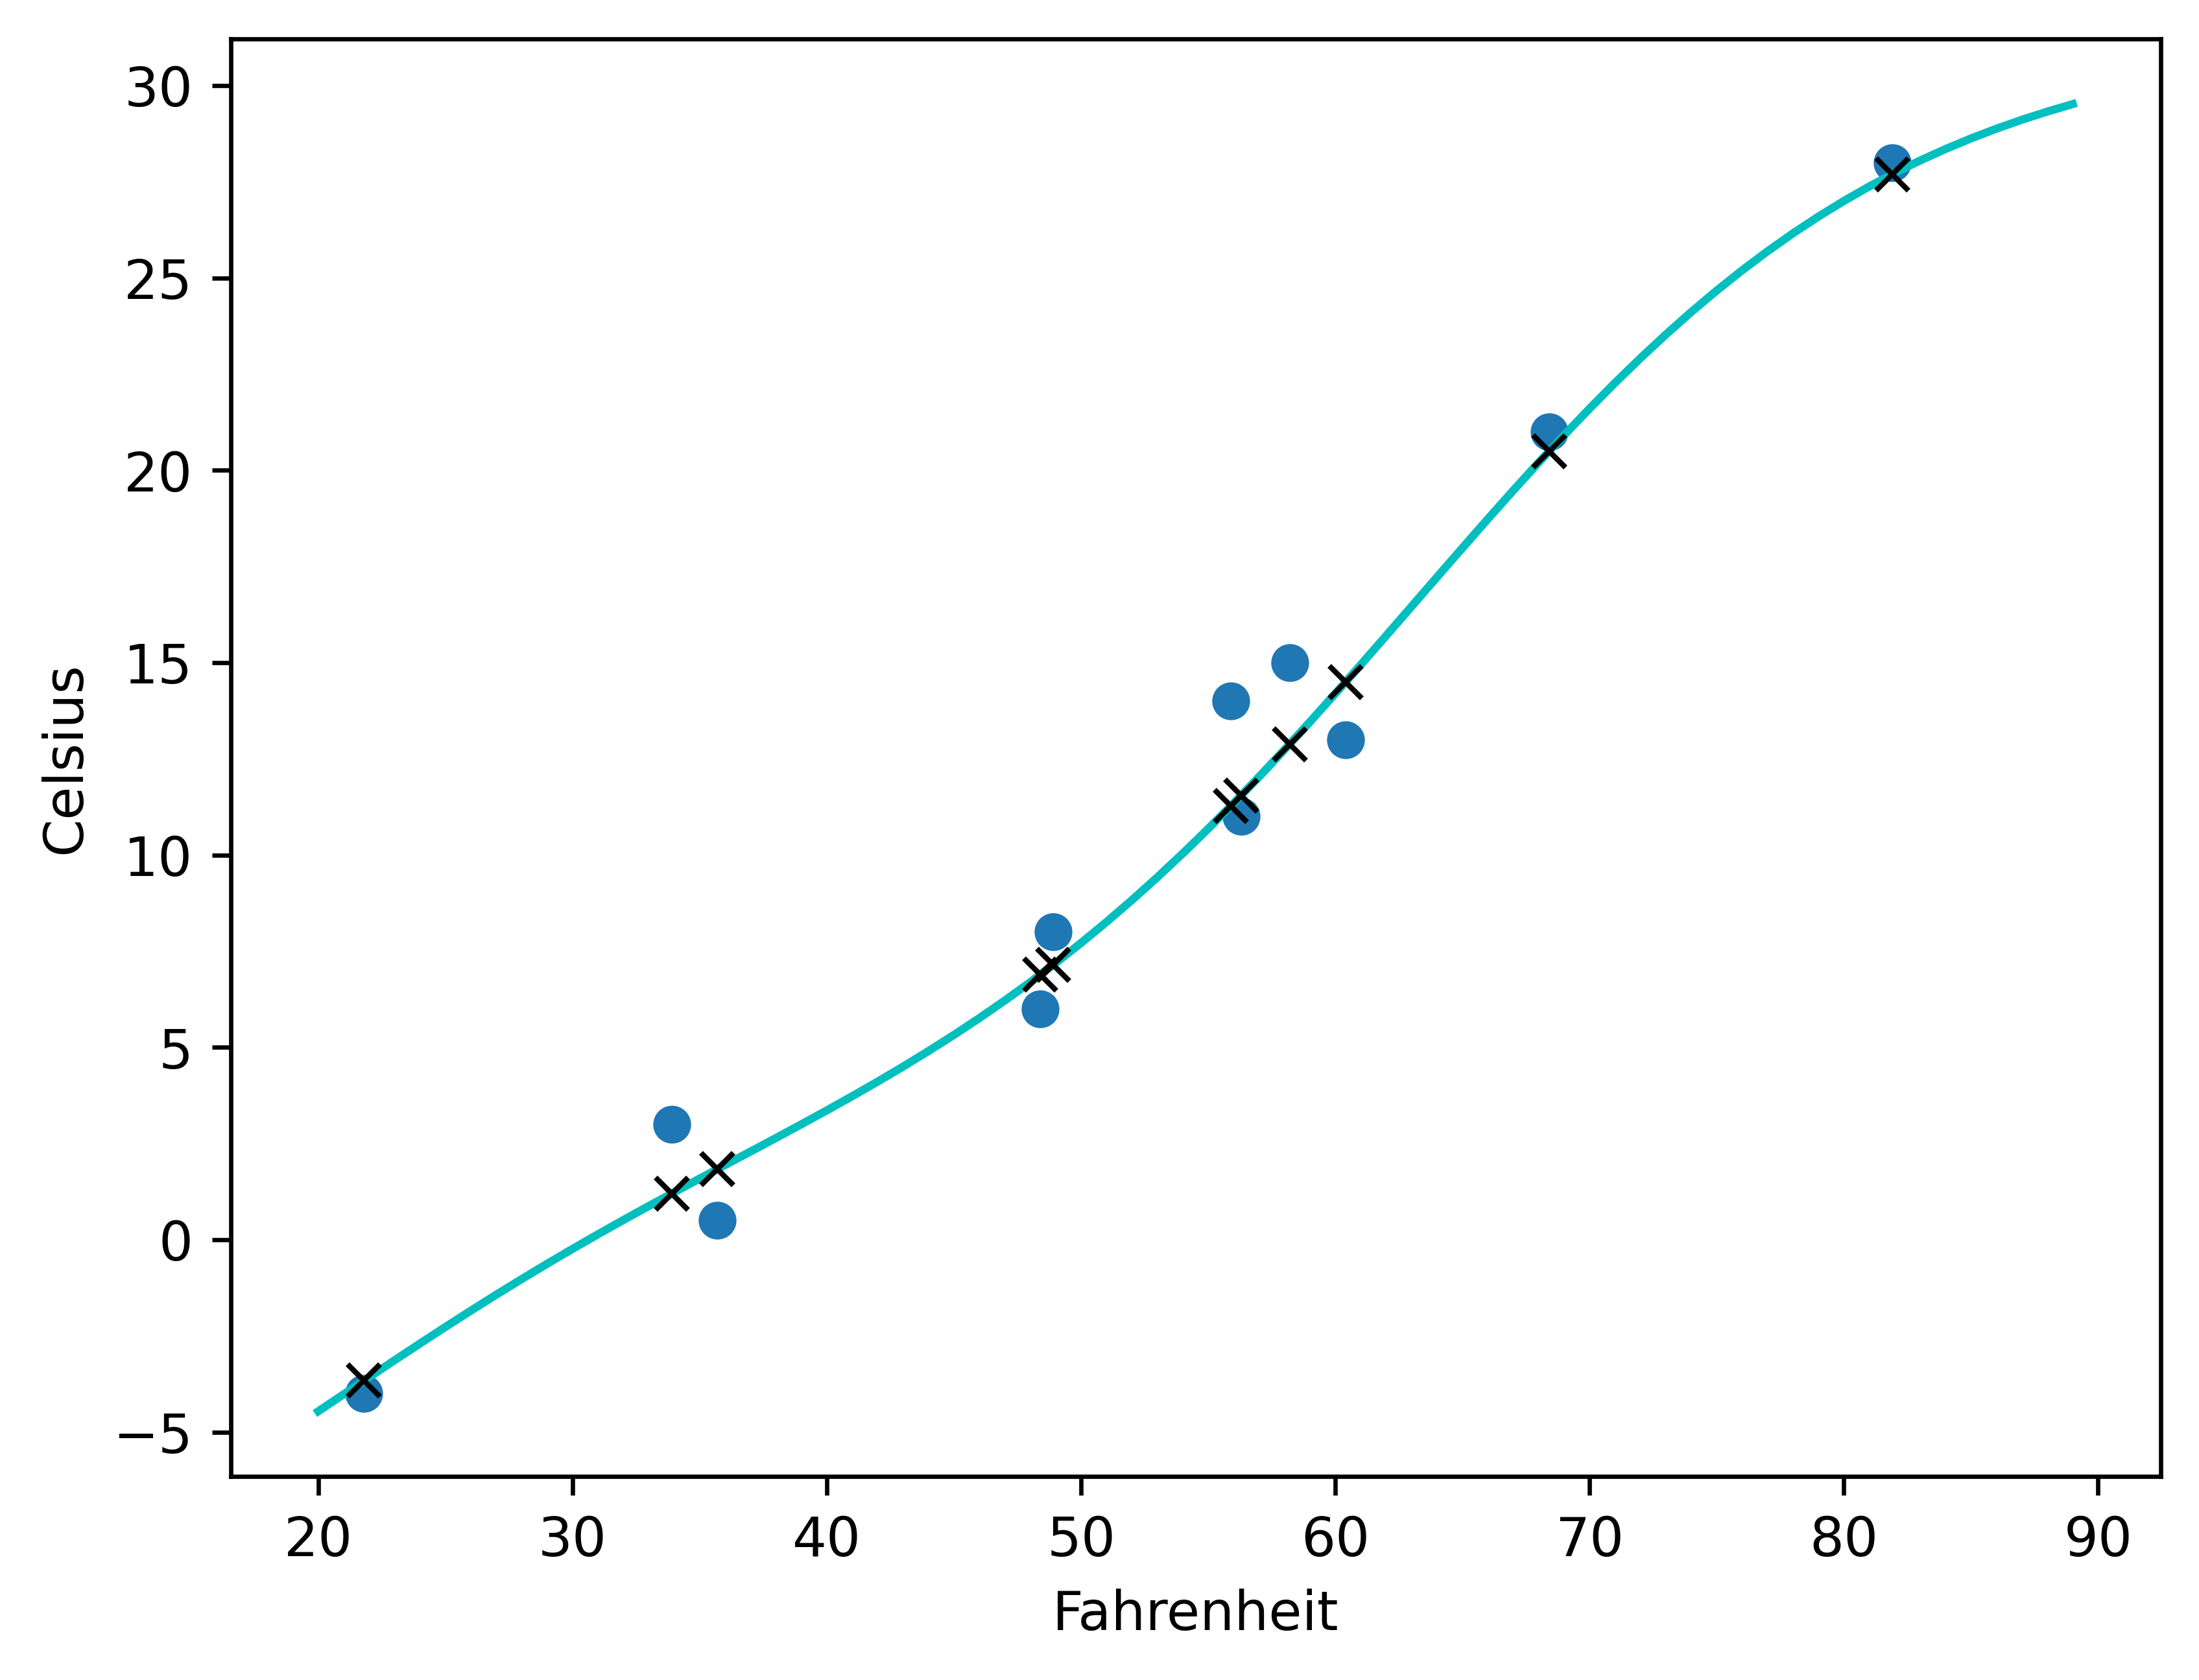

In [45]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')